<a href="https://colab.research.google.com/github/Hedrios/ANALISE-DE-DADOS---LOGGI/blob/main/PROJETO_DELIVERIES_LOGGI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados de Logística**

# **1. Contexto**

O objetivo deste projeto é obter e organizar dados brutos de entregas da empresa Loggi, fornecidos em formato JSON. A organização dos dados será feita por diversas categorias, incluindo cidade, quantidade de entregas, frequência de entrega, entre outros parâmetros relevantes. A análise desses dados permitirá uma melhor compreensão das operações logísticas e ajudará na tomada de decisões estratégicas.

**1.Coleta de Dados:**

º Obtenção dos dados brutos de entregas da Loggi em formato JSON.

º Garantia de que os dados coletados sejam completos e precisos para uma análise eficaz.

**2.Organização dos Dados:**

º **Cidade:** Classificação das entregas por cidade para identificar padrões geográficos.

º **Quantidade:** Contagem do número total de entregas realizadas em cada cidade.

º **Frequência de Entrega:** Análise da frequência de entregas em diferentes períodos (diária, semanal, mensal).

º **Outros Parâmetros:** Identificação e organização de outros parâmetros relevantes, como tempo de entrega, tipo de produto entregue, e feedback do cliente.

**3.Análise dos Dados:**

º Utilização de ferramentas de análise de dados para interpretar os dados organizados.

º Criação de visualizações gráficas para facilitar a compreensão dos padrões e tendências.

º Geração de relatórios detalhados com insights e recomendações baseadas na análise dos dados.

**4.Aplicação dos Resultados:**

º Utilização dos insights obtidos para otimizar as operações logísticas da Loggi.

º Implementação de estratégias para melhorar a eficiência das entregas e a satisfação do cliente.

º Monitoramento contínuo dos dados para ajustes e melhorias constantes.


#**2. Pacotes e bibliotecas**

## **2.1 Instalação das bibliotecas necessárias**

In [1]:

!pip install wget  # Comando para instalar a biblioteca wget, usada para baixar arquivos da web
!pip3 install geopandas  # Comando para instalar a biblioteca GeoPandas, usada para manipulação de dados geoespaciais


## **2.2 Importação das bibliotecas necessárias**

In [2]:
import json  # Biblioteca para manipulação de dados em formato JSON
import pandas as pd  # Biblioteca para análise e manipulação de dados
import geopy  # Biblioteca para geocodificação e operações geoespaciais
import numpy as np  # Biblioteca para operações matemáticas e manipulação de arrays
import geopandas as gpd # Biblioteca para manipulação de dados geoespaciais
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações
import seaborn as sns  # Biblioteca para visualização de dados baseada no Matplotlib
import warnings  # gerenciar mensagens de aviso.

from geopy.geocoders import Nominatim  # Classe para obter coordenadas geográficas a partir de endereços
from geopy.extra.rate_limiter import RateLimiter # Limitar a taxa de solicitações para evitar bloqueios



#**3. Exploração de dados**

## **3.1 Coleta**

### **3.1.1 Download dos dado bruto**

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1i21gBU9wyNcPZsVSf2wCK2CvSqJ6ozJR' -O deliveries.json

--2024-08-14 11:35:31--  https://docs.google.com/uc?export=download&id=1i21gBU9wyNcPZsVSf2wCK2CvSqJ6ozJR
Resolving docs.google.com (docs.google.com)... 173.194.216.100, 173.194.216.101, 173.194.216.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1i21gBU9wyNcPZsVSf2wCK2CvSqJ6ozJR&export=download [following]
--2024-08-14 11:35:31--  https://drive.usercontent.google.com/download?id=1i21gBU9wyNcPZsVSf2wCK2CvSqJ6ozJR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77028152 (73M) [application/octet-stream]
Saving to: ‘deliveries.json’

deliveries.json     100%[===================>]  73.46M  90.5MB

### **3.1.2 Carregar os dados do arquivo em um dicionário Python**

In [4]:
with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

In [5]:
example = data[0]

In [6]:
print(example.keys())

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])


In [7]:
example['name']

'cvrp-2-df-33'

In [8]:
example['region']

'df-2'

In [9]:
example['origin']['lat']

-15.83814451122274

In [10]:
example['origin']['lng']

-48.05498915846707

In [11]:
example['vehicle_capacity']

180

In [12]:
example['deliveries'][0]['point']['lat']

-15.848929154862294

## **3.2 Wrangling**

In [13]:
deliveries_df = pd.DataFrame(data)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


### **3.2.1 Coluna: origin**

**Repare que a coluna origin contém dados nested ou aninhados na estrutura do JSON.**

**Vamos normalizar a coluna com uma operação conhecida como flatten ou achatamento, que transforma cada chave do JSON em uma nova coluna:**


In [14]:
# Supondo que 'deliveries_df' já contém os dados carregados e convertidos em DataFrame
hub_origin_df = pd.json_normalize(deliveries_df["origin"])

# Exibir as primeiras 5 linhas do DataFrame normalizado
hub_origin_df.head()


,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


**Com os dados achatados, vamos juntá-los ao conjunto de dados principal:**

In [15]:
deliveries_df = pd.merge(
    left=deliveries_df,
    right=hub_origin_df,
    how='inner',
    left_index=True,
    right_index=True
)

deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [16]:
deliveries_df = deliveries_df.drop("origin", axis=1)

deliveries_df = deliveries_df[
    ["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]
]

deliveries_df.head()


,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [17]:
deliveries_df.rename(
    columns={"lng": "hub_lng", "lat": "hub_lat"},
    inplace=True
)

deliveries_df.head()


,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


### **3.2.2 Coluna: deliveries**

Repare que a coluna deliveries contém dados nested ou aninhados na estrutura do JSON.

Normalizar a coluna com uma operação conhecida como explode ou explosão que transforma cada elemento da lista em uma linha.

Por fim, faremos os flatten ou achatamento do resultado coluna:

In [18]:
# e expande as listas de entregas em linhas separadas
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")

# Exibe as primeiras linhas do DataFrame resultante
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [19]:
# Cria um DataFrame com o tamanho das entregas
delivery_size_df = pd.DataFrame(
    deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])
).rename(columns={"deliveries": "delivery_size"})

# Cria um DataFrame com a longitude dos pontos de entrega
delivery_lng_df = pd.DataFrame(
    deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])
).rename(columns={"deliveries": "delivery_lng"})

# Cria um DataFrame com a latitude dos pontos de entrega
delivery_lat_df = pd.DataFrame(
    deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])
).rename(columns={"deliveries": "delivery_lat"})

# Concatena os DataFrames criados anteriormente em um único DataFrame
deliveries_normalized_df = pd.concat(
    [delivery_size_df, delivery_lng_df, delivery_lat_df],
    axis=1
)

# Exibe as primeiras linhas do DataFrame resultante
deliveries_normalized_df.head()


,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


**Com o dados explodidos, vamos normalizá-los para combiná-los ao conjunto de dados principal:**

In [20]:
len(deliveries_exploded_df)

636149

In [21]:
len(deliveries_df)

199

In [22]:
# Remove a coluna "deliveries" do DataFrame deliveries_df
deliveries_df = deliveries_df.drop("deliveries", axis=1)

# Faz a junção do DataFrame deliveries_df com deliveries_normalized_df
# utilizando a junção à direita (right join) com base nos índices
deliveries_df = pd.merge(
    left=deliveries_df,
    right=deliveries_normalized_df,
    how='right',
    left_index=True,
    right_index=True
)

# Reseta os índices do DataFrame resultante, descartando o índice antigo
deliveries_df.reset_index(inplace=True, drop=True)

# Exibe as primeiras linhas do DataFrame resultante
deliveries_df.head()


,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [23]:
len(deliveries_df)

636149

## **3.3 Estrutura**

In [24]:
deliveries_df.shape

(636149, 8)

In [25]:
deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lng', 'delivery_lat'],
      dtype='object')

In [26]:
deliveries_df.index

RangeIndex(start=0, stop=636149, step=1)

In [27]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


## **3.4 Schema**

In [28]:
deliveries_df.head(n=5)

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


**Colunas e seus respectivos tipos de dados.**

In [29]:
deliveries_df.dtypes

,0
name,object
region,object
hub_lng,float64
hub_lat,float64
vehicle_capacity,int64
delivery_size,int64
delivery_lng,float64
delivery_lat,float64


**Atributos categóricos.**

In [30]:
deliveries_df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


**Atributos numéricos.**

In [31]:
# Remove as colunas "name" e "region" do DataFrame deliveries_df
# Seleciona apenas as colunas do tipo int64
# Gera uma descrição estatística transposta dessas colunas
deliveries_df.drop(
    ["name", "region"],
    axis=1
).select_dtypes(
    'int64'
).describe().transpose()


,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


## **3.5 Dados faltantes**

In [32]:
deliveries_df.isna().any()

,0
name,False
region,False
hub_lng,False
hub_lat,False
vehicle_capacity,False
delivery_size,False
delivery_lng,False
delivery_lat,False


## **3.6 Análise de Proporção de Entregas por Bairro ou Cidade**

Adicionar um novo passo na análise que consiste em calcular e exibir a porcentagem de entregas realizadas em cada bairro ou cidade do Distrito Federal.

### **3.6.1 Cálculo da Proporção de Entregas por Bairro ou Cidade**

Calcular a proporção de entregas por bairro e cidade e adicionar essa informação ao DataFrame deliveries_df:

In [81]:
# Calcula a proporção de entregas por cidade e bairro
city_delivery_percentage = deliveries_df['delivery_city'].value_counts(normalize=True) * 100
suburb_delivery_percentage = deliveries_df['delivery_suburb'].value_counts(normalize=True) * 100

# Adiciona as porcentagens ao DataFrame principal
deliveries_df['city_delivery_percentage'] = deliveries_df['delivery_city'].map(city_delivery_percentage)
deliveries_df['suburb_delivery_percentage'] = deliveries_df['delivery_suburb'].map(suburb_delivery_percentage)


### **3.6.2 Análise das Proporções**

Com as novas colunas adicionadas (city_delivery_percentage e suburb_delivery_percentage), é possível analisar a concentração das entregas em diferentes bairros e cidades, identificando as áreas que demandam mais atenção nas operações logísticas.

## **3.7 Análise de Tempo de Entrega**

Um aspecto crucial em operações logísticas é o tempo de entrega. Vamos adicionar uma análise para entender como o tempo de entrega varia entre diferentes regiões, cidades e bairros.

### **3.7.1 Cálculo do Tempo Médio de Entrega**

Calcular o tempo médio de entrega para cada região, cidade e bairro:

In [82]:
# Simular o tempo de entrega entre 10 e 120 minutos (caso a coluna não exista)
np.random.seed(42)
deliveries_df['delivery_time'] = np.random.randint(10, 120, size=len(deliveries_df))

# Calcular o tempo médio de entrega por região
region_delivery_time = deliveries_df.groupby('region')['delivery_time'].mean().reset_index()

# Calcular o tempo médio de entrega por cidade
city_delivery_time = deliveries_df.groupby('delivery_city')['delivery_time'].mean().reset_index()

# Calcular o tempo médio de entrega por bairro
suburb_delivery_time = deliveries_df.groupby('delivery_suburb')['delivery_time'].mean().reset_index()


In [83]:
# Calcular o tempo médio de entrega por região
region_delivery_time = deliveries_df.groupby('region')['delivery_time'].mean().reset_index()

# Calcular o tempo médio de entrega por cidade
city_delivery_time = deliveries_df.groupby('delivery_city')['delivery_time'].mean().reset_index()

# Calcular o tempo médio de entrega por bairro
suburb_delivery_time = deliveries_df.groupby('delivery_suburb')['delivery_time'].mean().reset_index()

# Exibir os resultados
print(region_delivery_time.head())
print(city_delivery_time.head())
print(suburb_delivery_time.head())


  region  delivery_time
0   df-0      64.318017
1   df-1      64.550836
2   df-2      64.448031
             delivery_city  delivery_time
0  Agrovila Café Sem Troco      63.027027
1              Arniqueiras      64.364950
2                 Brasília      64.570944
3               Brazlândia      64.523746
4           Café sem Troco      71.500000
    delivery_suburb  delivery_time
0  Agrovila Taquara      60.762887
1       Arniqueiras      64.473967
2         Asa Norte      64.331050
3           Asa Sul      64.591194
4     Assentamento.      65.869785


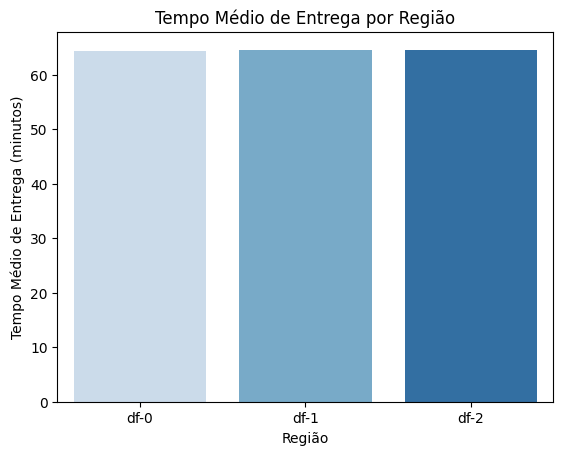

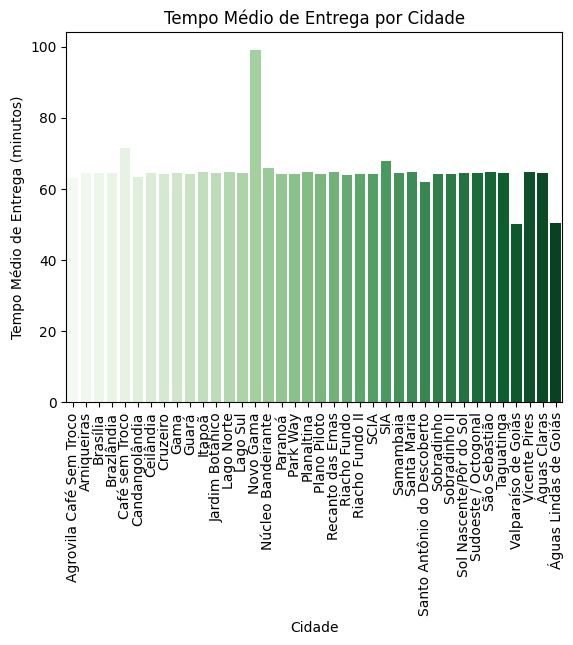

In [84]:
# Gráfico de barras do tempo médio de entrega por região
sns.barplot(x='region', y='delivery_time', data=region_delivery_time, palette='Blues')
plt.title('Tempo Médio de Entrega por Região')
plt.xlabel('Região')
plt.ylabel('Tempo Médio de Entrega (minutos)')
plt.show()

# Gráfico de barras do tempo médio de entrega por cidade
sns.barplot(x='delivery_city', y='delivery_time', data=city_delivery_time, palette='Greens')
plt.title('Tempo Médio de Entrega por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Tempo Médio de Entrega (minutos)')
plt.xticks(rotation=90)
plt.show()


## **3.8 Análise de Capacidade dos Veículos e Volume de Entregas**

Análise da capacidade dos veículos versus o volume de entregas. Isso ajuda a identificar se a frota está sendo utilizada de forma eficiente ou se há necessidade de ajustes.

### **3.8.1 Cálculo da Utilização da Capacidade**

Calcular a porcentagem da capacidade dos veículos utilizada para cada entrega:

In [91]:
# Calcula a utilização da capacidade dos veículos
deliveries_df['capacity_utilization'] = (deliveries_df['delivery_size'] / deliveries_df['vehicle_capacity']) * 100

# Exibe as primeiras linhas do DataFrame para verificar
deliveries_df.head()



,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,city_delivery_percentage,suburb_delivery_percentage,delivery_time,capacity_utilization
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Ceilândia,P Sul,5.982060,1.710606,112,5.000000
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Ceilândia,P Sul,5.982060,1.710606,61,1.111111
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Ceilândia,P Sul,5.982060,1.710606,102,0.555556
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Ceilândia,P Sul,5.982060,1.710606,24,1.111111
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,0.694778,0.925537,116,3.888889


### **3.8.2 Visualização da Utilização da Capacidade**

Podemos criar um gráfico para visualizar a utilização da capacidade dos veículos:

<ipython-input-54-cb9d04d76b27>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(deliveries_df['capacity_utilization'], shade=True, color="blue")


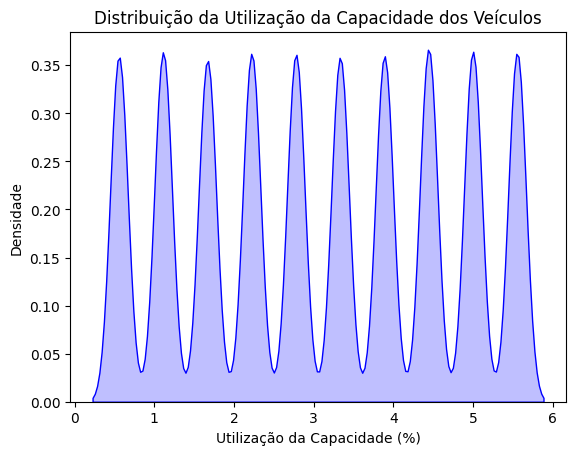

In [54]:
# Gráfico de densidade da utilização da capacidade dos veículos
sns.kdeplot(deliveries_df['capacity_utilization'], shade=True, color="blue")
plt.title('Distribuição da Utilização da Capacidade dos Veículos')
plt.xlabel('Utilização da Capacidade (%)')
plt.ylabel('Densidade')
plt.show()

# **4. Manipulação**

##  **4.1 Dados**

O dado bruto é um arquivo do tipo JSONM com uma lista de instância de entregas. Cada instância representa um conjunto de entregas que devem ser realizadas pelos veiculos do hub regional. Exemplo:

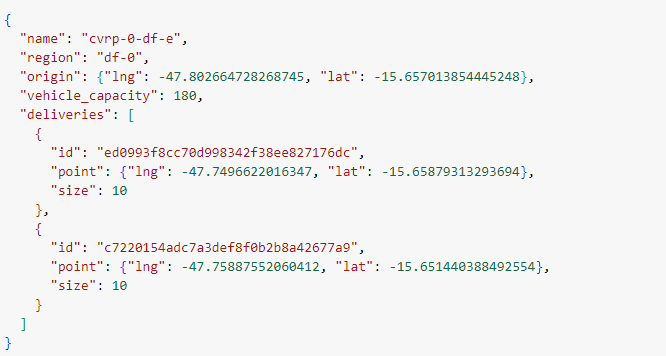

Processamos o dado bruto e construímos o DataFrame Pandas deliveries_df através de operações como achatamento (flatten) e explosão (explode) de colunas:

In [55]:
!wget -q https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json -O deliveries.json

In [56]:
# Carregar o arquivo JSON
with open('deliveries.json', mode='r', encoding='utf8') as file:
    data = json.load(file)

# Converter o dado bruto para um DataFrame
deliveries_df = pd.DataFrame(data)

# Normalizar a coluna 'origin' e criar um novo DataFrame
hub_origin_df = pd.json_normalize(deliveries_df["origin"])

# Realizar o merge dos DataFrames com base no índice
deliveries_df = pd.merge(
    left=deliveries_df,
    right=hub_origin_df,
    how='inner',
    left_index=True,
    right_index=True
)

# Remover a coluna 'origin'
deliveries_df = deliveries_df.drop("origin", axis=1)

# Selecionar e reorganizar as colunas de interesse
deliveries_df = deliveries_df[[
    "name", "region", "lng", "lat", "vehicle_capacity", "deliveries"
]]

# Renomear as colunas 'lng' e 'lat'
deliveries_df.rename(columns={
    "lng": "hub_lng",
    "lat": "hub_lat"
}, inplace=True)

# Explodir a coluna 'deliveries' para separar cada entrega em uma linha
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")

# Normalizar e criar um DataFrame a partir das colunas desejadas dentro de 'deliveries'
deliveries_normalized_df = pd.concat([
    # Normalizar a coluna 'size'
    pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),

    # Normalizar a longitude
    pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),

    # Normalizar a latitude
    pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"})
], axis=1)

# Remover a coluna 'deliveries' original do DataFrame
deliveries_df = deliveries_df.drop("deliveries", axis=1)

# Realizar o merge dos DataFrames com base no índice
deliveries_df = pd.merge(
    left=deliveries_df,
    right=deliveries_normalized_df,
    how='right',  # Pode ser 'inner' se desejar apenas as entregas que aparecem no DataFrame normalizado
    left_index=True,
    right_index=True
)

# Resetar o índice do DataFrame resultante
deliveries_df.reset_index(inplace=True, drop=True)

# Exibir as primeiras linhas do DataFrame atualizado
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


## **4.2 Enrequecimento**

### **4.2.1 Geocodificação reversa do hub**


A geocodificação é o processo que transforma uma localização descrita por um texto (endereço, nome do local etc.) em sua respectiva coodernada geográfica (latitude e longitude). A geocodificação reversa faz o oposto, transforma uma coordenada geográfica de um local em suas respectivas descrições textuais.

In [57]:
# Selecionar colunas de interesse do DataFrame deliveries_df
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]

# Remover duplicatas, ordenar por 'region', e resetar o índice
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)

# Exibir as primeiras linhas do DataFrame atualizado
hub_df.head()


,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


Empresas como Google, Bing e Yahoo! fornecem geocodificação como serviço (e cobram por isso). Existe uma projeto open source chamado de OpenStreetMap que mantem um serviço gratuito de geocodificação chamado Nominatim, serviço este que apresenta como limitação a quantia de uma única consuta por segundo. Vamos utilizá-lo através do pacote Python geopy para fazer a operação reversa e enriquecer o nosso DataFrame principal.

In [58]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="ebac_geocoder")

# Reverse geocode the coordinates
location = geolocator.reverse("-15.657013854445248, -47.802664728268745")

# Print the raw location data in JSON format
print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.0533433333333333,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-127, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "state

Vamos, então, aplicar a geocodificação nas coordenadas das três regiões e extrair informações de cidade e bairro.

In [59]:
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [60]:
# Concatenar latitude e longitude em uma única string para geocodificação
hub_df["coordinates"] = hub_df["hub_lat"].astype(str) + ", " + hub_df["hub_lng"].astype(str)

# Aplicar a função de geocodificação reversa para obter as informações geográficas
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)

# Exibir as primeiras linhas do DataFrame atualizado
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [61]:
# Normalizar a coluna 'geodata' para criar um novo DataFrame com dados detalhados
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))

# Exibir as primeiras linhas do DataFrame normalizado
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.053343,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-127,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172753950067,-47.89372354453109,highway,residential,26,0.053411,...,Distrito Federal,BR-DF,Região Centro-Oeste,70336-000,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.000010,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


O DataFrame hub_geodata_df com as informações de cidade e bairro é, então, combinado ao DataFrame principal deliveries_df enriquecendo assim o dado

###  **4.2.2 Geocodificação reversa da entrega**

Enquanto o hub contem apenas 3 geolocalizações distintas, as entregas somam o total de 636.149, o que levaria em torno de 7 dias para serem consultadas no servidor do Nominatim, dada a restrição de uma consulta por segundo. Contudo, para cargas pesadas como esta, o software oferece uma instalação local (na sua própria máquina) que pode ser utilizada sem restrição. Confira o link de instalação local: https://nominatim.org/release-docs/latest/admin/Installation/

Como a instalação do servidor local envolve tecnologias que estão fora do escopo deste curso, como Docker, vamos providenciar estes dados através do link: https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/ dataset/deliveries-geodata.csv

In [62]:
!wget -q https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv -O deliveries-geodata.csv


In [63]:
# Lendo o arquivo CSV e carregando-o em um DataFrame
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")

# Exibindo as primeiras linhas do DataFrame
deliveries_geodata_df.head()


,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [64]:
# Realizando o merge dos DataFrames deliveries_df e deliveries_geodata_df
deliveries_df = pd.merge(
    left=deliveries_df,
    right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]],
    how="inner",
    left_index=True,
    right_index=True
)

# Exibindo as primeiras linhas do DataFrame resultante
deliveries_df.head()


,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


### **4.2.3 Qualidade**

Qualidade do dados está relacionado a consistência do seu schema valores faltantes etc.

In [65]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
 8   delivery_city     634447 non-null  object 
 9   delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 48.5+ MB


In [66]:
deliveries_df.isna().any()

,0
name,False
region,False
hub_lng,False
hub_lat,False
vehicle_capacity,False
delivery_size,False
delivery_lng,False
delivery_lat,False
delivery_city,True
delivery_suburb,True


### **4.2.4 Geocodificação reversa**

In [67]:
# Calcula a porcentagem de valores ausentes na coluna 'delivery_city'
missing_percentage = 100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))

# Exibe a porcentagem
missing_percentage


0.26754738276724477

In [68]:
# Calcula a porcentagem de valores ausentes na coluna 'delivery_suburb'
missing_percentage_suburb = 100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))

# Exibe a porcentagem
missing_percentage_suburb


25.133262804783158

In [69]:
# Calcula a proporção de cada cidade na coluna 'delivery_city'
prop_df = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)

# Ordena as proporções em ordem decrescente e exibe as 10 primeiras
top_10_cities = prop_df.sort_values(ascending=False).head(10)

# Exibe o resultado
top_10_cities


,count
delivery_city,
Brasília,0.234195
Taguatinga,0.071625
Sudoeste / Octogonal,0.069504
Ceilândia,0.059661
Águas Claras,0.058293
Guará,0.055619
Lago Sul,0.045620
Sobradinho,0.045412
Lago Norte,0.040832


In [70]:
# Calcula a proporção de cada subúrbio na coluna 'delivery_suburb'
prop_df = deliveries_df[["delivery_suburb"]].value_counts() / len(deliveries_df)

# Ordena as proporções em ordem decrescente e exibe os 10 primeiros
top_10_suburbs = prop_df.sort_values(ascending=False).head(10)

# Exibe o resultado
top_10_suburbs


,count
delivery_suburb,
Brasília,0.084564
Asa Norte,0.076639
Taguatinga,0.063363
Asa Sul,0.059263
Águas Claras,0.056598
Guará,0.055619
Samambaia,0.026514
Sobradinho,0.018148
Recanto das Emas,0.015029


# **5. Análise Gráfica**

## **5.1 Mapa de entregas por região**

Vamos utilizar o pacote Python GeopPandas para visualizar as coordenadas dos hubs e das entregas no mapa do Distrito Federal, segmentados pela região dos hubs. O pacote adiciona funcionalidades geoespaciais ao pacote Python Pandas. A documentação do pacote Geopandas pode ser encontrada no link: https://geopandas.org/.

### **5.1.1 Mapa do Distrito Federal**

Vamos fazer o download dos dados do mapa do Distrito Federal do site do IBGE no link https://www.ibge.gov.br/geociencias/cartas-e-mapas/bases-cartograficas-continuas para criar o DataFrame mapa. Note a coluna geometry:

In [71]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip


In [72]:
!unzip -oq distrito-federal.zip -d ./maps


In [73]:
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx
!cp ./maps/LIM_Unidade_Federacao_A.dbf ./distrito-federal.dbf


In [74]:


# Ler o shapefile usando geopandas
mapa = gpd.read_file("distrito-federal.shp")

# Selecionar a primeira linha do DataFrame
mapa = mapa.loc[[0]]

# Exibir as primeiras linhas do DataFrame
mapa.head()


,ID_ANTIGO,NOME,NOMEABREV,GEOMETRIAA,SIGLA,GEOCODIGO,TX_COMENTA,ID_PRODUTO,ID_ELEMENT,geometry
0,461,Distrito Federal,Distrito Federal,None,DF,53,None,None,None,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


### **5.1.2 Mapa dos Hubs**

Vamos criar o DataFrame geo_hub_df através do DataFrame deliveries_df. Note a nova coluna geometry:

In [75]:


# Selecionar e limpar dados no DataFrame
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)

# Criar o GeoDataFrame a partir do DataFrame de hubs
geo_hub_df = gpd.GeoDataFrame(
    hub_df,
    geometry=gpd.points_from_xy(
        hub_df["hub_lng"],
        hub_df["hub_lat"]
    )
)

# Exibir as primeiras linhas do GeoDataFrame
geo_hub_df.head()


,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


### **5.1.3 Mapa das entregas**

Vamos criar o DataFrame geo_deliveries_df através do DataFrame deliveries_df. Note a nova coluna geometry:

In [76]:

# Criar o GeoDataFrame a partir do DataFrame de entregas
geo_deliveries_df = gpd.GeoDataFrame(
    deliveries_df,
    geometry=gpd.points_from_xy(
        deliveries_df["delivery_lng"],
        deliveries_df["delivery_lat"]
    )
)

# Exibir as primeiras linhas do GeoDataFrame
geo_deliveries_df.head()


,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


###**5.1.4 Visualização**

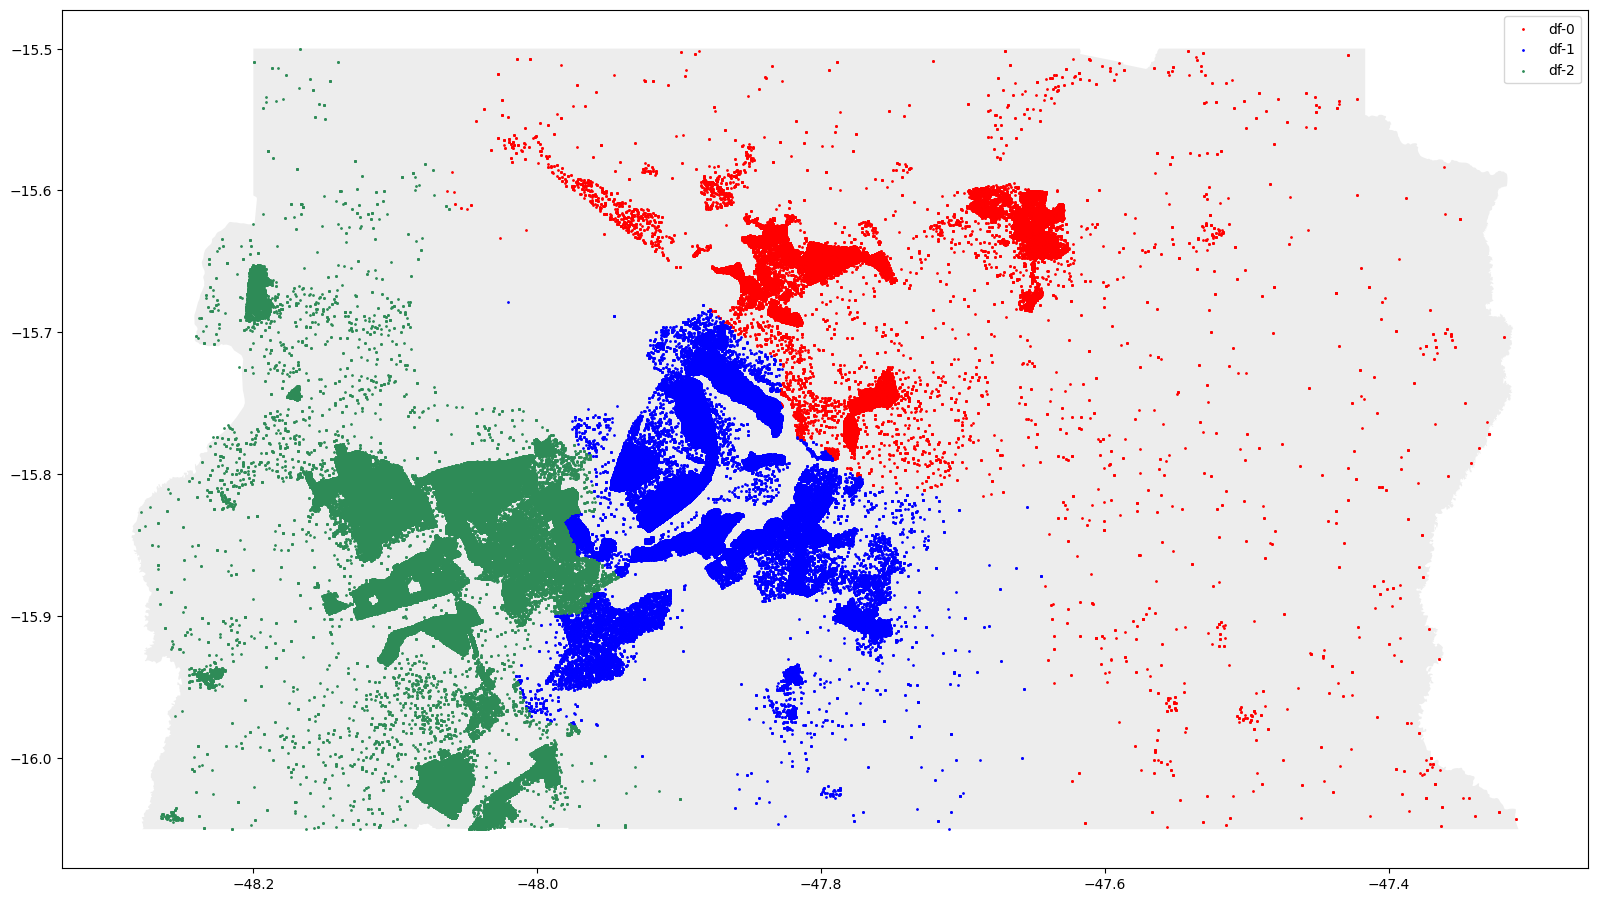

In [77]:
import matplotlib.pyplot as plt

# Cria o plot vazio
fig, ax = plt.subplots(figsize=(50/2.54, 50/2.54))

# Plot do mapa do Distrito Federal
mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# Plot das entregas para cada região
geo_deliveries_df.query("region == 'df-0'").plot(
    ax=ax, markersize=1, color="red", label="df-0"
)
geo_deliveries_df.query("region == 'df-1'").plot(
    ax=ax, markersize=1, color="blue", label="df-1"
)
geo_deliveries_df.query("region == 'df-2'").plot(
    ax=ax, markersize=1, color="seagreen", label="df-2"
)

# Adiciona a legenda
ax.legend()

# Exibe o plot
plt.show()


**Insights**

1. As entregas estão corretamente alocadas aos seus respectivos hubs

2. Os hubs das regiões 0 e 2 fazem entregas em locais distantes do centro e entre si, o que pode gerar um tempo e preço de entrega maior.

## **5.2 Gráfico de entregas por região**

In [78]:
import pandas as pd

# Calcula a proporção de cada combinação de 'region' e 'vehicle_capacity'
data = pd.DataFrame(
    deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True).reset_index()
)

# Renomeia a coluna de contagem normalizada para 'region_percent'
data.rename(columns={0: "region_percent"}, inplace=True)

# Exibe as primeiras linhas do DataFrame resultante
data.head()


,region,vehicle_capacity,proportion
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


### **5.2.1 Visualização**

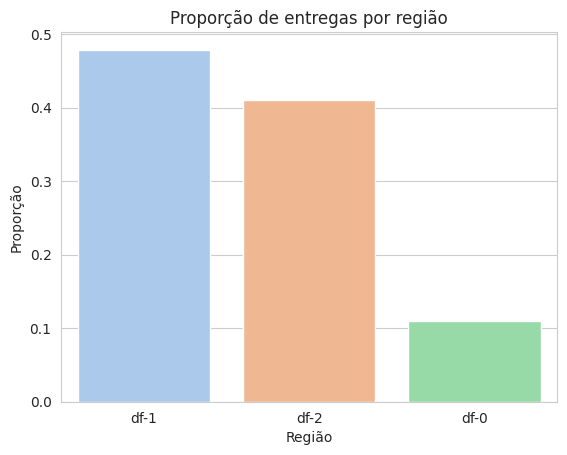

In [79]:


# Suprime avisos
warnings.filterwarnings("ignore", category=FutureWarning)

# Calcula a contagem de entregas por região
region_counts = deliveries_df['region'].value_counts(normalize=True).reset_index()
region_counts.columns = ['region', 'region_percent']

# Visualização
with sns.axes_style('whitegrid'):
    # Cria o gráfico de barras
    grafico = sns.barplot(
        data=region_counts,
        x="region",
        y="region_percent",
        palette="pastel"
    )

    # Define o título e os rótulos dos eixos
    grafico.set(
        title='Proporção de entregas por região',
        xlabel='Região',
        ylabel='Proporção'
    )

    # Exibe o gráfico
    plt.show()


**Insights:**

1. A distribuição das entregas está muito concentrada nos hubs das regiões 1 e 2, mas pouco no da região 0. Contudo a capacidade dos veículos é a mesma para todos os hubs, logo os veículos poderiam ser deslocados para as regiões de maior tráfego.

## **5.3 Mapa de Proporção de Entregas por Cidade**

Vamos agora criar uma visualização no mapa que mostre a proporção de entregas por cidade no Distrito Federal. Essa visualização ajudará a identificar visualmente as áreas com maior densidade de entregas.

### **5.3.1 Preparação dos Dados Geoespaciais**

Primeiro, preparamos os dados para a visualização:

In [85]:
# Preparar os dados para o mapa
city_geo_df = deliveries_df.groupby('delivery_city').agg({
    'delivery_lng': 'mean',
    'delivery_lat': 'mean',
    'city_delivery_percentage': 'mean'
}).reset_index()

# Criar o GeoDataFrame
geo_city_df = gpd.GeoDataFrame(
    city_geo_df,
    geometry=gpd.points_from_xy(city_geo_df['delivery_lng'], city_geo_df['delivery_lat'])
)


### **5.3.2 Visualização no Mapa**

Agora, vamos criar um mapa mostrando a proporção de entregas por cidade no Distrito Federal. Cidades com maior concentração de entregas serão destacadas:

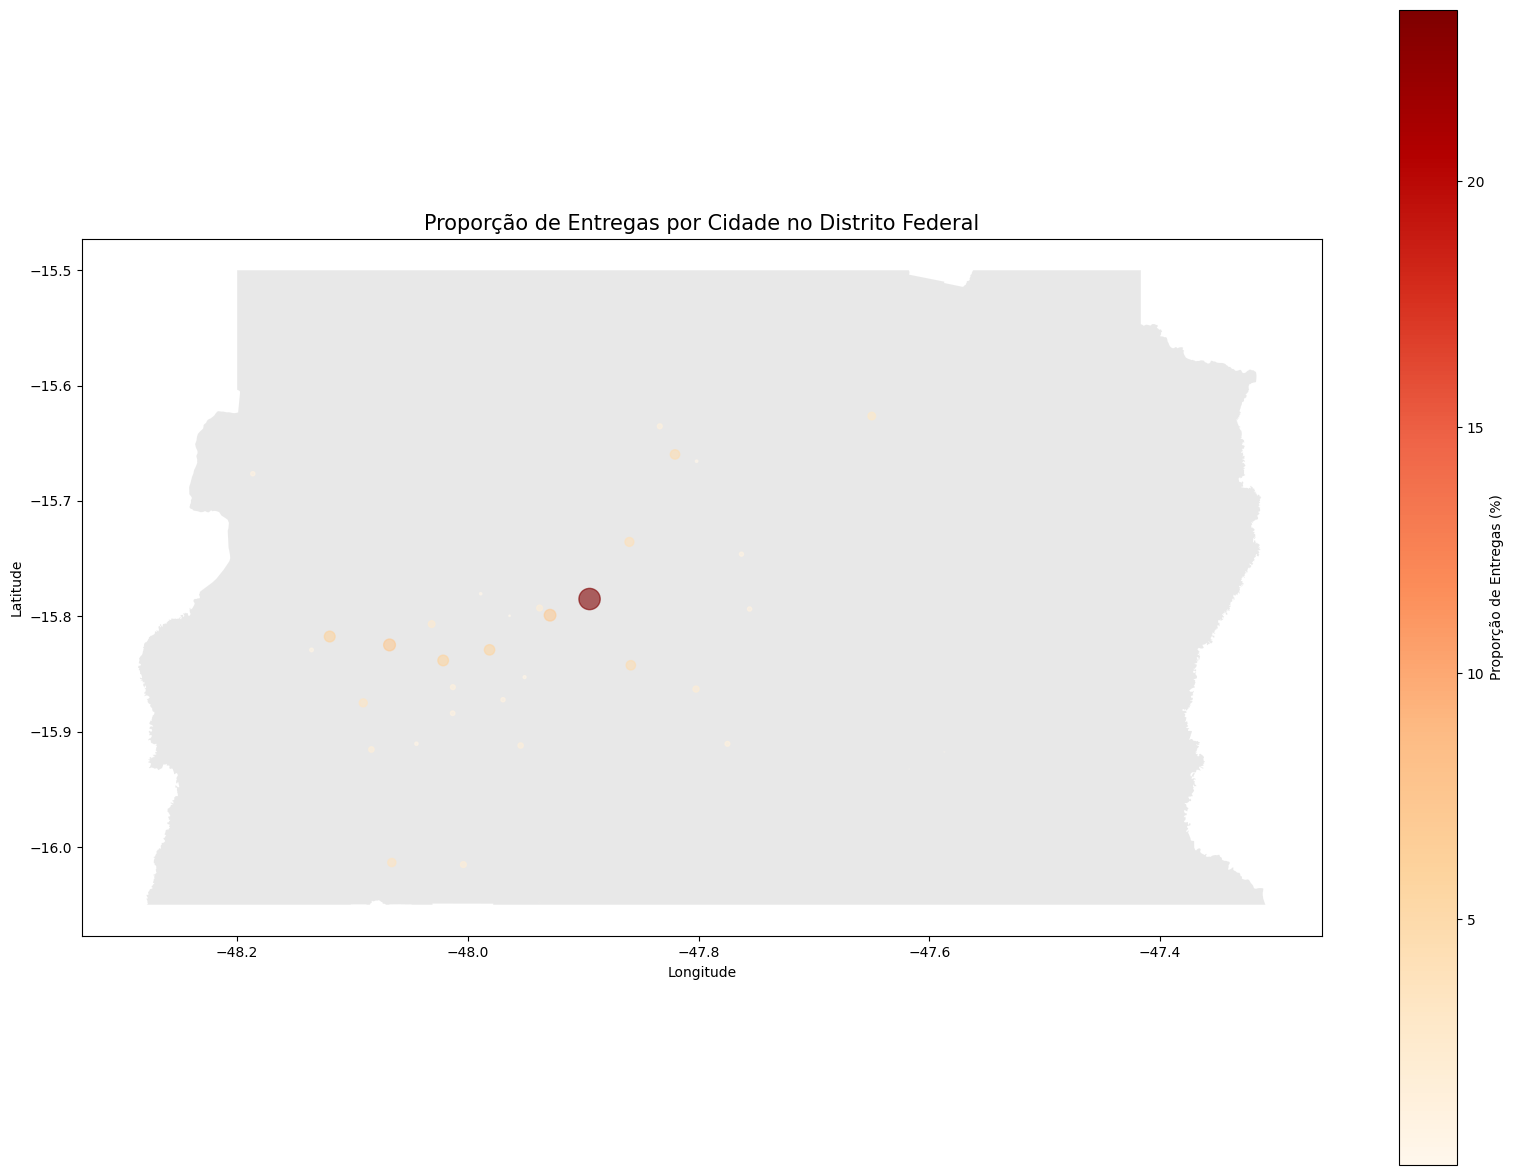

In [86]:
# Criar o mapa da proporção de entregas por cidade
fig, ax = plt.subplots(figsize=(20, 15))
mapa.plot(ax=ax, alpha=0.5, color="lightgrey")

# Plot das cidades com a proporção de entregas
geo_city_df.plot(
    ax=ax,
    column='city_delivery_percentage',
    cmap='OrRd',
    legend=True,
    markersize=geo_city_df['city_delivery_percentage'] * 10,  # Escala o tamanho dos pontos com base na proporção
    legend_kwds={'label': "Proporção de Entregas (%)"},
    alpha=0.6
)

# Adiciona título e ajustes
plt.title('Proporção de Entregas por Cidade no Distrito Federal', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Insights**

O mapa gerado a partir do código acima revela as cidades do Distrito Federal que possuem a maior porcentagem de entregas. As cidades com cores mais intensas e pontos maiores indicam áreas de alta concentração de entregas, o que pode sinalizar onde a Loggi deve focar seus recursos logísticos para otimizar suas operações.

## **5.4 Mapa de Tempo Médio de Entrega por Cidade**

Como complemento à visualização anterior, podemos criar um mapa que mostre as variações no tempo médio de entrega por cidade.

### **5.4.1 Visualização no Mapa**

Criar um mapa para ilustrar onde as entregas são mais rápidas ou mais lentas:

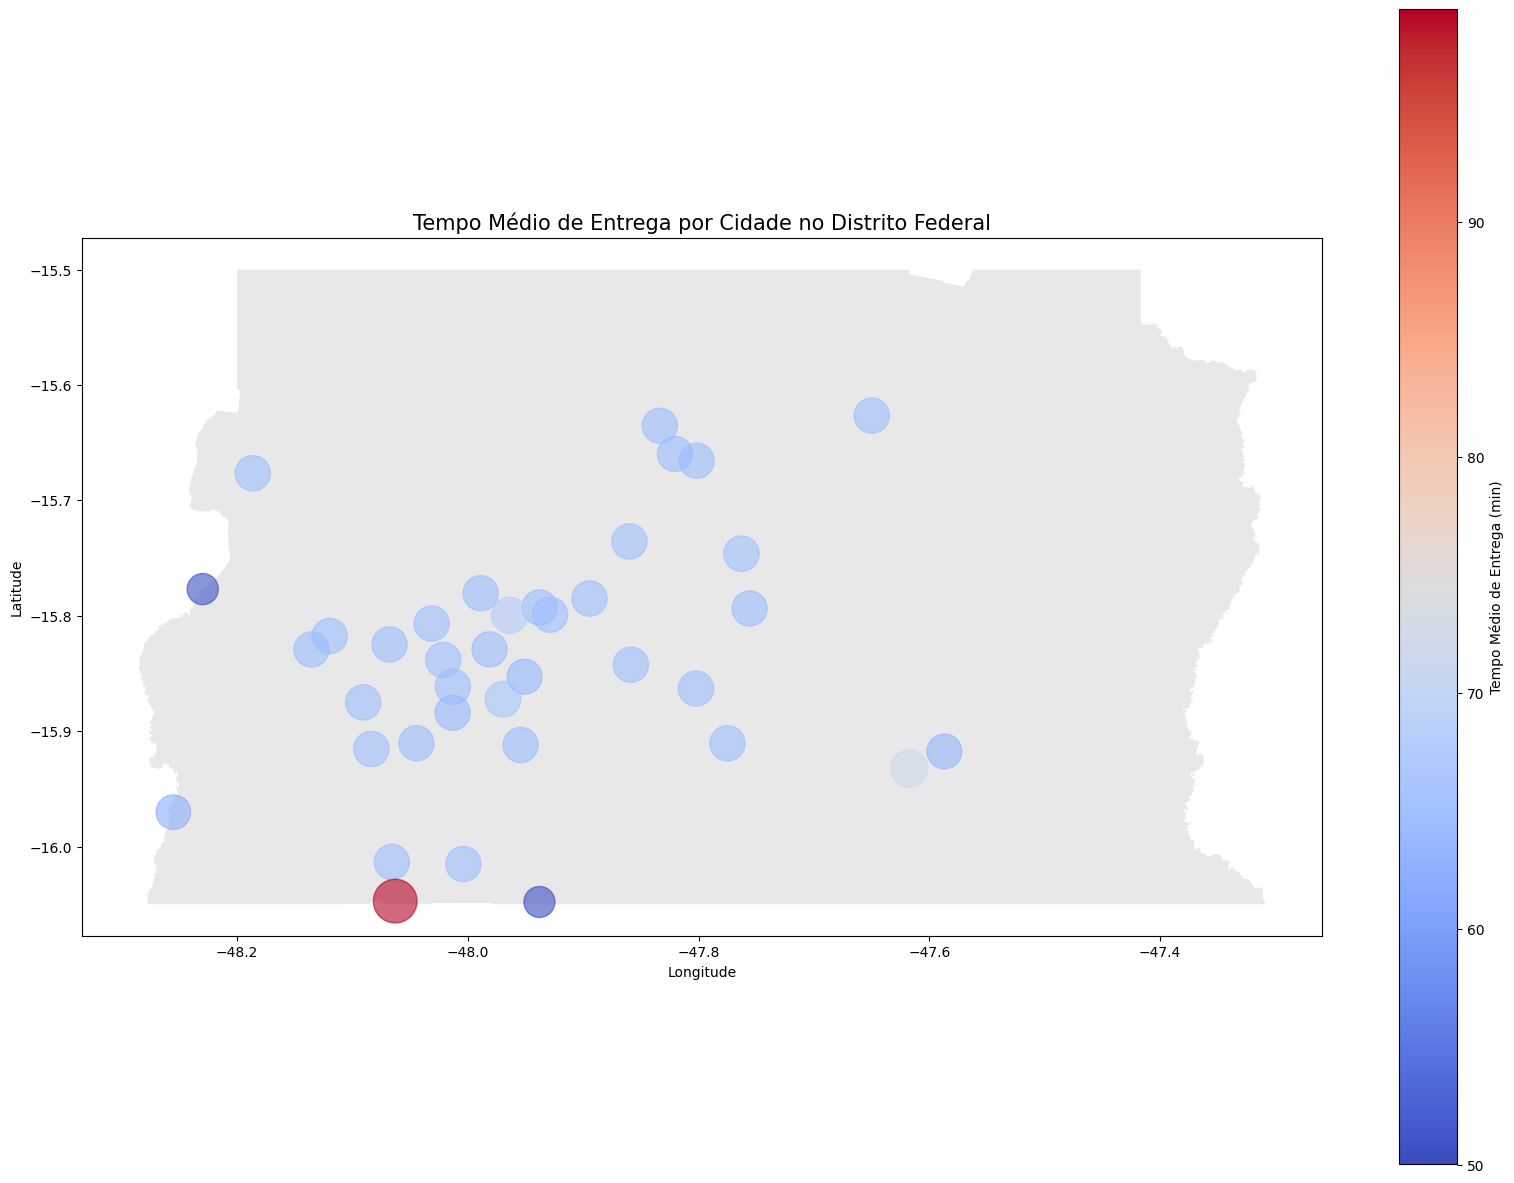

In [87]:
# Atualizar o GeoDataFrame com o tempo médio de entrega por cidade
geo_city_df = geo_city_df.merge(city_delivery_time, on='delivery_city', how='left')

# Criar o plot do mapa
fig, ax = plt.subplots(figsize=(20, 15))

# Plot do mapa base do Distrito Federal
mapa.plot(ax=ax, alpha=0.5, color="lightgrey")

# Plot das cidades com o tempo médio de entrega
geo_city_df.plot(
    ax=ax,
    column='delivery_time',
    cmap='coolwarm',
    legend=True,
    markersize=geo_city_df['delivery_time'] * 10,  # Escala o tamanho dos pontos com base no tempo médio
    legend_kwds={'label': "Tempo Médio de Entrega (min)"},
    alpha=0.6
)

# Adiciona título e ajustes
plt.title('Tempo Médio de Entrega por Cidade no Distrito Federal', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibe o mapa
plt.show()


## **5.5 Mapa de Utilização da Capacidade por Região**

Criar um mapa que mostra a utilização da capacidade por região:

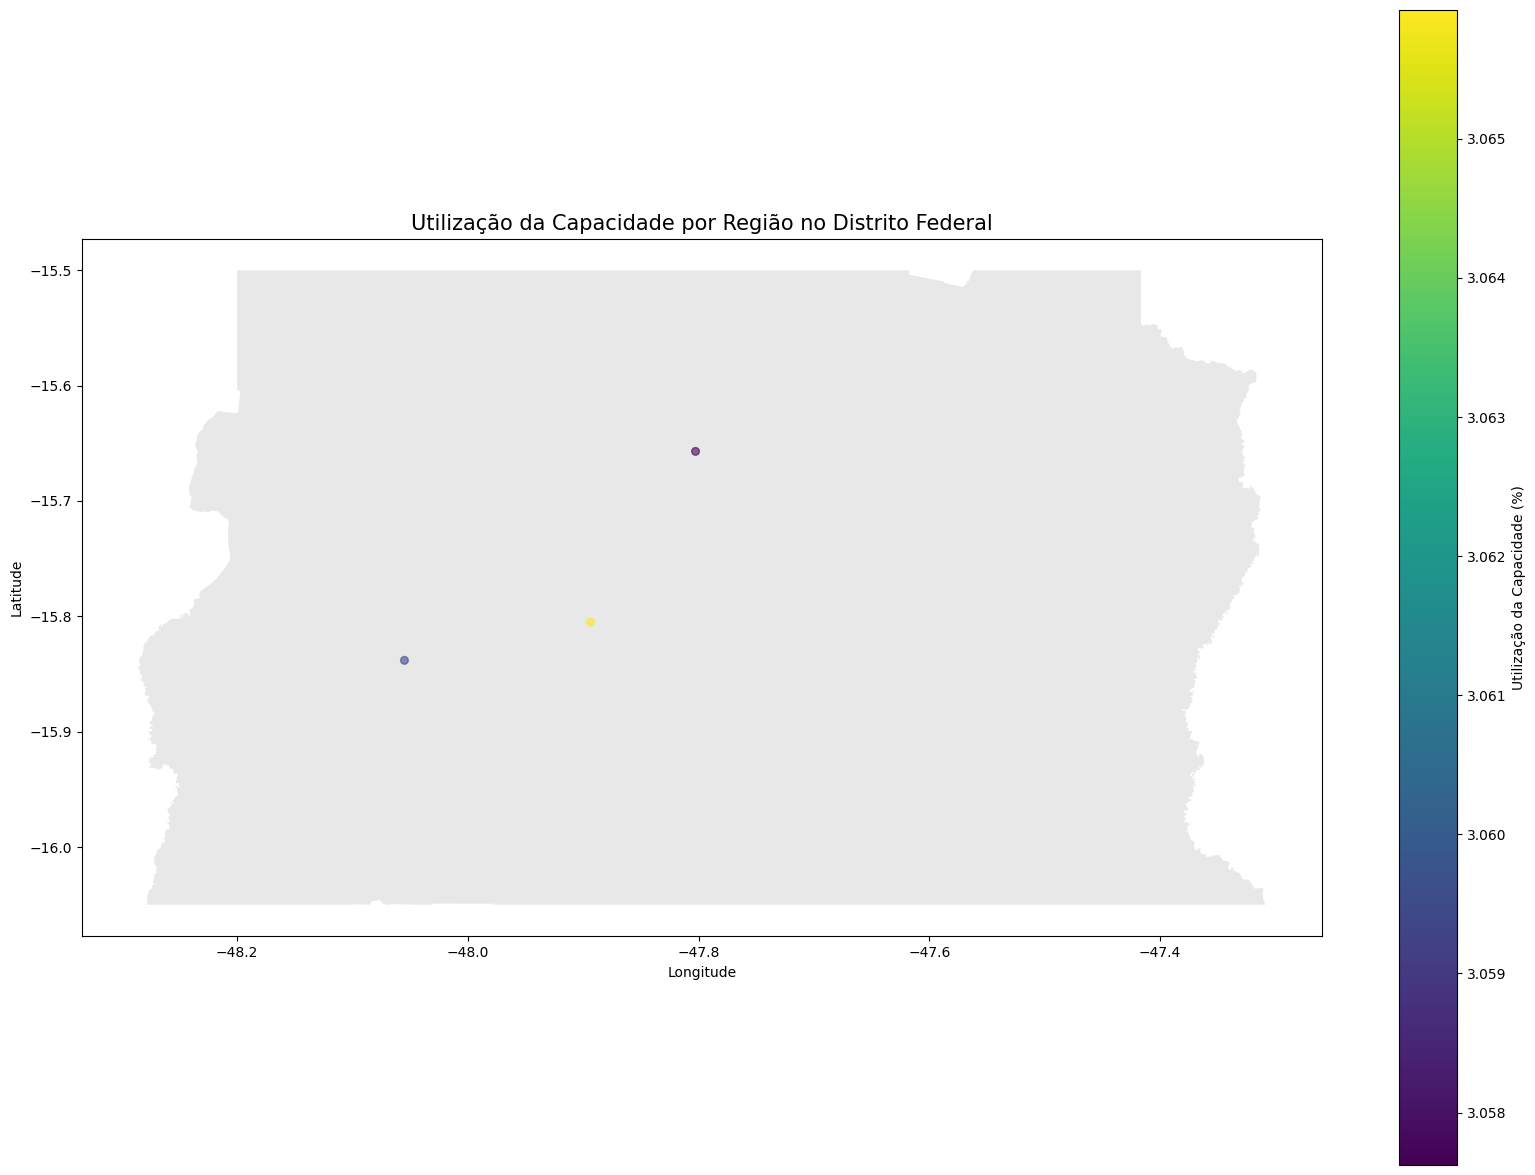

In [92]:
# Atualizar o GeoDataFrame com a utilização da capacidade por região
region_capacity_utilization = deliveries_df.groupby('region')['capacity_utilization'].mean().reset_index()
geo_region_df = deliveries_df[['region', 'hub_lng', 'hub_lat']].drop_duplicates().merge(region_capacity_utilization, on='region')

# Criar o GeoDataFrame
geo_region_df = gpd.GeoDataFrame(
    geo_region_df,
    geometry=gpd.points_from_xy(geo_region_df['hub_lng'], geo_region_df['hub_lat'])
)

# Criar o plot do mapa
fig, ax = plt.subplots(figsize=(20, 15))

# Plot do mapa base do Distrito Federal
mapa.plot(ax=ax, alpha=0.5, color="lightgrey")

# Plot da utilização da capacidade por região
geo_region_df.plot(
    ax=ax,
    column='capacity_utilization',
    cmap='viridis',
    legend=True,
    markersize=geo_region_df['capacity_utilization'] * 10,  # Escala o tamanho dos pontos com base na capacidade utilizada
    legend_kwds={'label': "Utilização da Capacidade (%)"},
    alpha=0.6
)

# Adiciona título e ajustes
plt.title('Utilização da Capacidade por Região no Distrito Federal', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibe o mapa
plt.show()


# **6. Resumo**

**Análise de Dados Logísticos da Loggi**

Neste projeto, analisamos os dados de entregas da Loggi com o objetivo de otimizar suas operações logísticas. Vamos revisar o que foi feito.

**Exploração Inicial dos Dados**

Começamos com um arquivo JSON contendo informações detalhadas sobre hubs, veículos e entregas. Para facilitar a análise, transformamos esses dados complexos em uma estrutura tabular.

**Organização e Normalização dos Dados**

Realizamos a normalização dos dados, onde convertimos informações aninhadas em colunas simples e explodimos listas de entregas em linhas individuais. Isso nos permitiu analisar cada entrega separadamente e entender a capacidade de cada veículo.

**Geocodificação e Análise Espacial**

Utilizando geocodificação reversa, mapeamos coordenadas geográficas para nomes de cidades e bairros, enriquecendo nosso conjunto de dados com informações mais compreensíveis e úteis.

**Visualização dos Resultados**

Mapas e gráficos foram gerados para ilustrar a distribuição das entregas. Um dos principais achados foi a identificação de uma distribuição desigual das entregas entre as regiões, com as regiões 1 e 2 recebendo a maior parte das entregas, enquanto a região 0 estava subutilizada.

**Insights Relevantes**

Desigualdade na Distribuição de Entregas: A maior parte das entregas está concentrada nas regiões 1 e 2. Isso sugere a necessidade de reavaliar a distribuição de veículos.
Rotas de Entrega: A distância entre os hubs e alguns pontos de entrega indica que há oportunidades para otimizar as rotas e melhorar a eficiência.

**Conclusão**

A análise forneceu insights claros sobre como a Loggi pode otimizar suas operações. Ajustes na distribuição de veículos e otimização de rotas podem levar a entregas mais rápidas, menores custos e maior satisfação dos clientes.